## ДОМАШНЕЕ ЗАДАНИЕ 2 часть 2 (так как требуются результаты прошлого задания, тут все в одном)

In [1]:
! pip install pep8
! pip install pymystem3
! pip install nltk

### Устанoвка пакетов

In [2]:
from pymystem3 import Mystem
from pprint import pprint
from pymorphy2 import MorphAnalyzer
import nltk
from nltk.tokenize import word_tokenize
import collections
import json

### Производим импорт

## Задание 1 и 2

In [3]:
with open('1.txt', encoding='utf-8') as f:
    book = f.read()

#### Открываем файл для чтения

In [4]:
m = Mystem()
%time analise_text = m.analyze(book)

Wall time: 40.2 s


### Замеряем время анализа книги.

In [5]:
with open('lemmas.json', 'w', encoding='utf-8') as f:
    json.dump(analise_text, f, ensure_ascii=False)

#### Создаем новый файл для записи

## Задание 3

In [6]:
nltk.download('punkt')
morph = MorphAnalyzer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Милослава\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
%%time
tokens = word_tokenize(book)
words = [w.lower() for w in tokens if w.isalpha()]
lems = []

for i in words:
    analise = morph.parse(i)
    lems.append(analise)

Wall time: 68.8 ms


### Удаляем пунктуацию и токенизируем.

In [8]:
list_lem_form = []
for w in lems:
    first = w[0]
    lem_form = (first.word, (first.normal_form, first.tag.POS))
    list_lem_form.append(lem_form)

In [9]:
more_list = [lem_form[1][0] for lem_form in list_lem_form]

Лемма и часть речи "закидывается" в отдельный массив. Без массива отказ записать результаты в файл.

In [10]:
with open('lem_pymorph.json', 'w', encoding='utf-8') as f:
    json.dump(list_lem_form, f, ensure_ascii=False)

Записываем результаты в файл.

## Задание 4

In [11]:
form_count = collections.Counter()
summary = 0
for i  in list_lem_form:
    summary = summary + 1
    form = i[1]
    form_count[form] += 1

for form in form_count:
    print(form, round(form_count[form]/summary, 5))

('чтоб', 'CONJ') 0.00295
('жить', 'VERB') 0.00295
('вы', 'NPRO') 0.0059
('в', 'PREP') 0.04425
('интересный', 'ADJF') 0.00295
('время', 'NOUN') 0.00295
('один', 'ADJF') 0.00885
('очень', 'ADVB') 0.0059
('древний', 'ADJF') 0.00295
('проклятие', 'NOUN') 0.00295
('это', 'PRCL') 0.0118
('бог', 'NOUN') 0.02065
('который', 'ADJF') 0.00295
('играть', 'VERB') 0.00885
('игра', 'NOUN') 0.0059
('игральный', 'ADJF') 0.0059
('доска', 'NOUN') 0.0059
('у', 'PREP') 0.0059
('они', 'NPRO') 0.00885
('целый', 'ADJF') 0.00295
('мир', 'NOUN') 0.00295
('а', 'CONJ') 0.01475
('человеческий', 'ADJF') 0.00295
('жизнь', 'NOUN') 0.00295
('чаща', 'NOUN') 0.0059
('всего', 'ADVB') 0.00885
('выигрывать', 'VERB') 0.00885
('рок', 'NOUN') 0.0354
('даже', 'PRCL') 0.00295
('не', 'PRCL') 0.0177
('всегда', 'ADVB') 0.00885
('большинство', 'NOUN') 0.00295
('предпочитать', 'VERB') 0.00295
('костя', 'NOUN') 0.00295
('но', 'CONJ') 0.00295
('шахматы', 'NOUN') 0.00295
('или', 'CONJ') 0.00885
('похожий', 'ADJF') 0.00295
('причём', 'C

Сначала считаем количество слов всех частей речи в тексте. Потом считаем и выводим долю каждой части речи относительно всех слов.

### Глаголы

Найдем в книге глаголы. Занесем их в массив. Выведем самые популярные.

In [12]:
verb_count = collections.Counter()
for i in list_lem_form:
    if i[1] == 'VERB':
        verb_count[i[0]] += 1
        
top_verb = verb_count.most_common(20)      
for i in top_verb:
    print(i[0], i[1])

### Наречия

Найдем в книге наречия. Занесем в массив. Выведем самые популярные.

In [13]:
adv_count = collections.Counter()
for i in list_lem_form:
    if i[1] == 'ADVB':
        adv_count[i[0]] += 1
        
top_adv = adv_count.most_common(20)      
for i in top_adv:
    print(i[0], i[1])

## Задание 5

Как хорошо, что мы сделали третье задание. Возьмем же леммы оттуда!

In [14]:
massiv = []
for i in list_lem_form:
    massiv.append(i[0])
bi = nltk.bigrams(massiv)
tri = nltk.trigrams(massiv)

bi_count = collections.Counter(bi).most_common(25)
tri_count = collections.Counter(tri).most_common(25)

Считаем частотность би- и триграмм из задания 3. Выводим ниже.

In [15]:
print('Самые частотные биграмы:')
for i in bi_count:
    print(i[0])

Самые частотные биграмы:
('чаще', 'всего')
('одарил', 'противников')
('рок', 'ну')
('может', 'в')
('в', 'несчастных')
('несчастных', 'влюблённых')
('и', 'что')
('чтоб', 'жили')
('жили', 'вы')
('вы', 'в')
('в', 'интересные')
('интересные', 'времена')
('времена', 'одно')
('одно', 'очень')
('очень', 'древнее')
('древнее', 'проклятие')
('проклятие', 'это')
('это', 'боги')
('боги', 'которые')
('которые', 'играют')
('играют', 'в')
('в', 'игры')
('игры', 'игральная')
('игральная', 'доска')
('доска', 'у')


In [16]:
print('Самые частотные триграмы:')
for i in tri_count:
    print(i[0])

Самые частотные триграмы:
('в', 'несчастных', 'влюблённых')
('чтоб', 'жили', 'вы')
('жили', 'вы', 'в')
('вы', 'в', 'интересные')
('в', 'интересные', 'времена')
('интересные', 'времена', 'одно')
('времена', 'одно', 'очень')
('одно', 'очень', 'древнее')
('очень', 'древнее', 'проклятие')
('древнее', 'проклятие', 'это')
('проклятие', 'это', 'боги')
('это', 'боги', 'которые')
('боги', 'которые', 'играют')
('которые', 'играют', 'в')
('играют', 'в', 'игры')
('в', 'игры', 'игральная')
('игры', 'игральная', 'доска')
('игральная', 'доска', 'у')
('доска', 'у', 'них')
('у', 'них', 'целый')
('них', 'целый', 'мир')
('целый', 'мир', 'а')
('мир', 'а', 'играют')
('а', 'играют', 'они')
('играют', 'они', 'человеческими')


Выводятся частотные для русского языка коснтрукции с предлогами, конструкции с именами героев.

### ПРОДОЛЖЕНИЕ

#### Визуализация данных 4-ого задания

In [17]:
import matplotlib.pyplot as plt

Имортируем нужное

Строим графики, таблицы, диаграммы, коммунизм. Наглядно понятно, что мы строим.

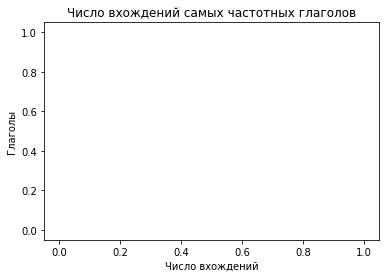

In [18]:
Y = [i[0] for i in top_verb[:20]]
X = [i[1] for i in top_verb[:20]]
plt.scatter(X, Y, color='green', label='verbs')
plt.title('Число вхождений самых частотных глаголов')
plt.ylabel('Глаголы')
plt.xlabel('Число вхождений')
plt.show()

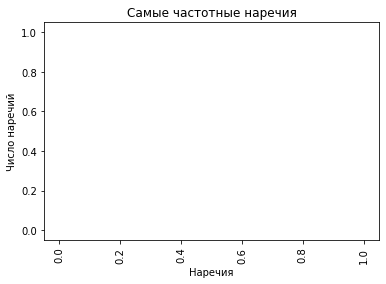

In [19]:
Y = [i[0] for i in top_adv[:20]]
X = [i[1] for i in top_adv[:20]]
plt.bar(Y, X, color='yellow')
plt.xticks(rotation='vertical')
plt.title('Самые частотные наречия')
plt.ylabel('Число наречий')
plt.xlabel('Наречия')
plt.show()

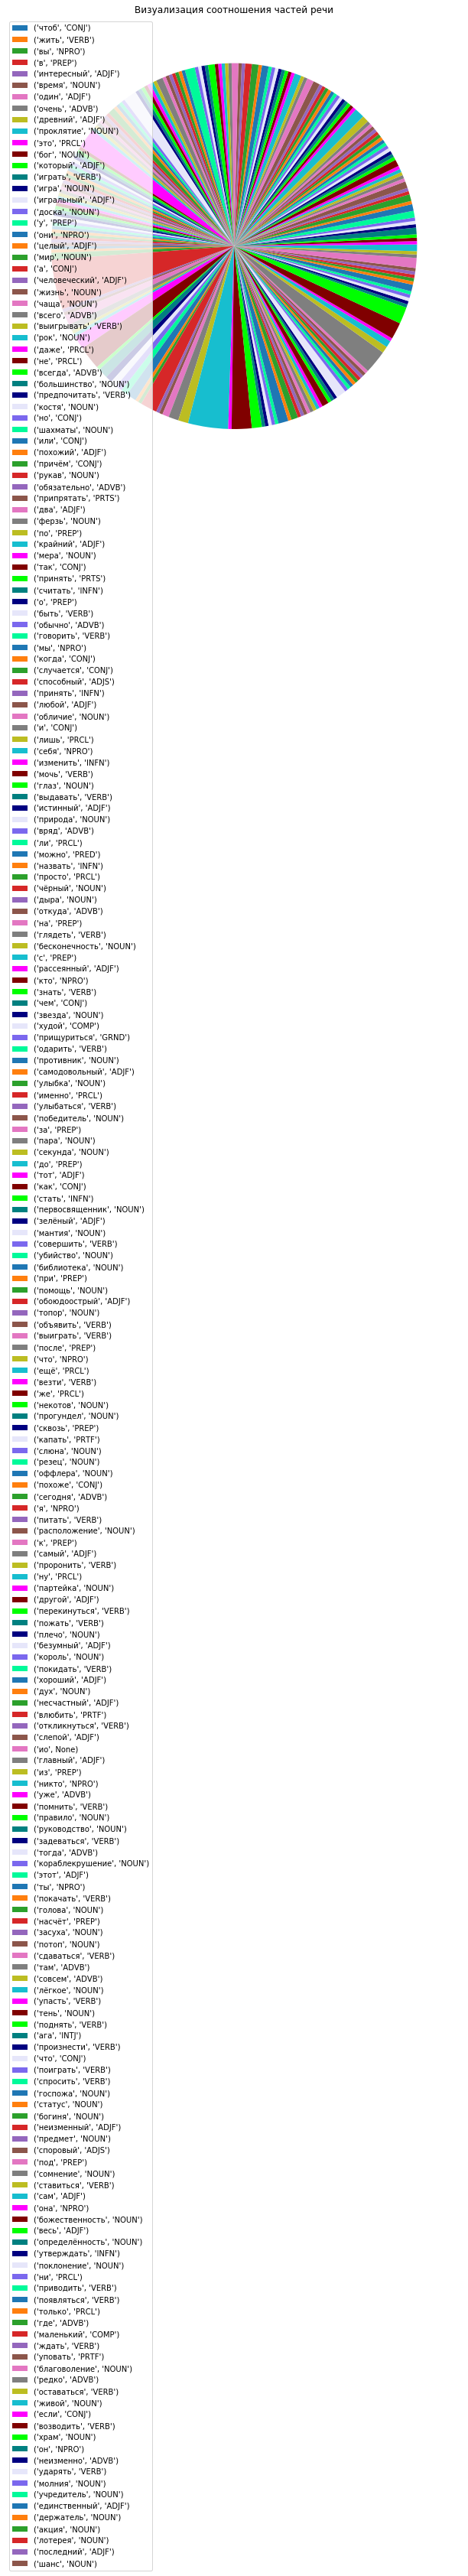

In [20]:
labels = [str(i) for i in form_count]
size = list(form_count.values())
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
          'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', '#FF00FF',
          '#800000', '#00FF00', '#008080', '#000080', '#E6E6FA', '#7B68EE', '#00FA9A']
plt.figure(figsize=(11, 11))
plt.title('Соотношение частей речи')
plt.pie(size, colors=colors, startangle=180)
plt.legend(labels, loc="best")
plt.show()

### Преобразование файлов в датафрэйм

In [21]:
def parse(x):
    func = {'word' : x[0], 'lemm' : x.normal_form, 'POS' : x.tag.POS, 'case' : x.tag.case , 'number' : x.tag.number,
         'gender' : x.tag.gender, 'animacy' : x.tag.animacy , 'aspect' : x.tag.aspect, 
         'transitivity' : x.tag.transitivity, 'person' : x.tag.person, 
         'tense' : x.tag.tense, 'mood' : x.tag.mood, 'involvement' : x.tag.involvement, 
         'voice' : x.tag.voice}
    return func

In [22]:
table = []
for token in mtokens:
    table.append(parse(token))

NameError: name 'mtokens' is not defined

In [24]:
datfr = pd.DataFrame(table)
datfr.to_csv('chto.csv', sep='\t', index=False)
tablo = pd.read_csv('chto.csv', sep='\t').fillna('')
tablo.head(20)

NameError: name 'pd' is not defined

### Облако слов:

In [25]:
text = ' '.join([word for word in tablo['lemm'].values])

wordcloud = WordCloud(
    background_color ='white',
    width = 800,
    height = 800, 
).generate(text)

plt.figure(figsize = (7, 7), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('Облако слов')
plt.show()

NameError: name 'tablo' is not defined

### Длина слов:

In [26]:
datfr['length'] = datfr['word'].apply(len)
plt.figure(figsize=(10, 6))
sns.distplot(datfr['length'], bins=17, color='pink')
plt.title('Distribution of word length')
plt.ylabel('%')
plt.xlabel('Length of word');

NameError: name 'datfr' is not defined

#### спасибо Саше Морозовой за помощь!